# Ejercicio 8

In [1]:
from ipynb.fs.defs.Ejercicio7 import closest_timestamps
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches

Leemos los datos de odometría y barrido láser:

In [2]:
odom_file_name = "odom.txt"
odom_data = np.loadtxt(odom_file_name)

scan_file_name = "scan.txt"
scan_data = np.loadtxt(scan_file_name)

Corremos el algoritmo definido en el Ejercicio 7:

In [3]:
timestamps_odom = odom_data[:,0]
timestamps_scan = scan_data[:,0]
matching_idxs = closest_timestamps(timestamps_odom, timestamps_scan)

Ploteamos timestamps de una fracción del tiempo total de simulación. Diferenciamos los timestamps de las mediciones de odometría cercanos a un timestamp de medición de barrido láser graficándolos con otro color.

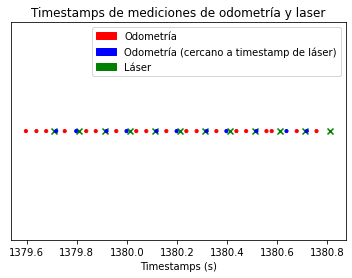

In [4]:
# Colors: red, green and blue
COLOR_ODOM_1 = 'r'
COLOR_ODOM_2 = 'b'
COLOR_SCAN = 'g'

# Number of timestamps to plot
N_scan = 12
N_odom = int(N_scan * 2.5)

# Array of colors for odometry measurements (red or blue according to matching_idxs)
colors_odom = np.full(len(timestamps_odom),COLOR_ODOM_1)
colors_odom[matching_idxs] = COLOR_ODOM_2

#plt.hlines(0,0,10)  # Draw a horizontal line
plt.scatter(timestamps_scan[:N_scan], np.zeros_like(timestamps_scan)[:N_scan], marker='x', color=COLOR_SCAN)
plt.scatter(timestamps_odom[:N_odom], np.zeros_like(timestamps_odom)[:N_odom], marker='o', s=10, color=colors_odom[:N_odom])
plt.title('Timestamps de mediciones de odometría y laser')
plt.xlabel("Timestamps (s)")
plt.yticks([]) # Remove y ticks

# Legend
red_patch = mpatches.Patch(color=COLOR_ODOM_1, label='Odometría')
blue_patch = mpatches.Patch(color=COLOR_ODOM_2, label='Odometría (cercano a timestamp de láser)')
green_patch = mpatches.Patch(color=COLOR_SCAN, label='Láser')
plt.legend(handles=[red_patch, blue_patch, green_patch])

plt.show()

**NOTA**: se muestra solamente una fracción del tiempo total de simulación.

En el gráfico puede verse claramente la diferencia entre las tasas de muestreo entre odometría y sensor láser. EL algoritmo definido en el Ejercicio 7 nos permite seleccionar las mediciones de odometría más cercanas temporalmente a las mediciones del sensor láser.